In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid', {'axes.grid' : False})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sales_data = pd.read_csv("https://www.cameronvetter.com/wp-content/uploads/2018/07/WA_Fn-UseC_-Sales-Win-Loss.csv")

In [4]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


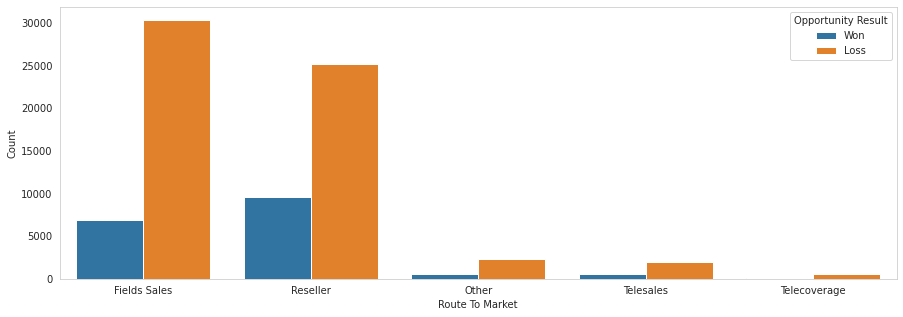

In [5]:
plt.figure(figsize=(15,5))
sns.countplot('Route To Market',data=sales_data, hue='Opportunity Result')
plt.ylabel(ylabel='Count')
plt.show()

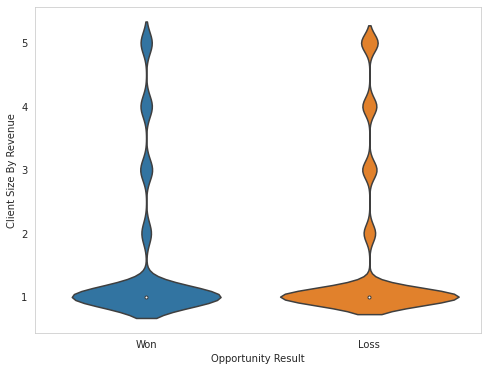

In [6]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", data=sales_data)
plt.show()

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
num_sales_data = pd.DataFrame(sales_data)
#convert the categorical columns into numeric since sklearn only understands numeric data
num_sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
num_sales_data['Region'] = le.fit_transform(sales_data['Region'])
num_sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
num_sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
num_sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
num_sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
num_sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [8]:
#droping columns which we don't need
cols = [col for col in num_sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
data = num_sales_data[cols]
#assigning the Oppurtunity Result column as target
target = num_sales_data['Opportunity Result']
data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

***Choosing an alogrithm:***
https://scikit-learn.org/stable/tutorial/machine_learning_map/

Navie-Byes (Gaussian Navie Byes) Algorithm :-

In [10]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred1 = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred1, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


LinearSVC Alogrithm :-

In [11]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0, dual=False)
#train the algorithm on training data and predict using the testing data
pred2 = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred2, normalize = True))

LinearSVC accuracy :  0.7717874231032126


K-NeighboursClassifier Algorithm :-

In [12]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred3 = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred3))

KNeighbors accuracy score :  0.8145505809979494


In [13]:
#checking how many n_neighbours is the best in the case

# Grid Search Method
from sklearn.model_selection import GridSearchCV
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#fit model to data
knn_gscv.fit(data_test, target_test)
print(knn_gscv.best_params_)

# Random Search Method
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid, random_state=0)
search = clf.fit(data_test, target_test)
print(search.best_params_)

{'n_neighbors': 9}
{'n_neighbors': 6}
